In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import sys
sys.path.append('src')
from poisson_disk import PoissonDiskSampler
%aimport settings
import settings
%aimport cnn_utils
import cnn_utils
%aimport geometry_utils
import geometry_utils
%aimport dataset_utils
import dataset_utils

import numpy as np
import cv2
import matplotlib
import matplotlib.pylab as plt
sys.path.append(settings.CAFFE_PYTHON_PATH)
import caffe
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Piosson Disk Sampling

samples size:  45


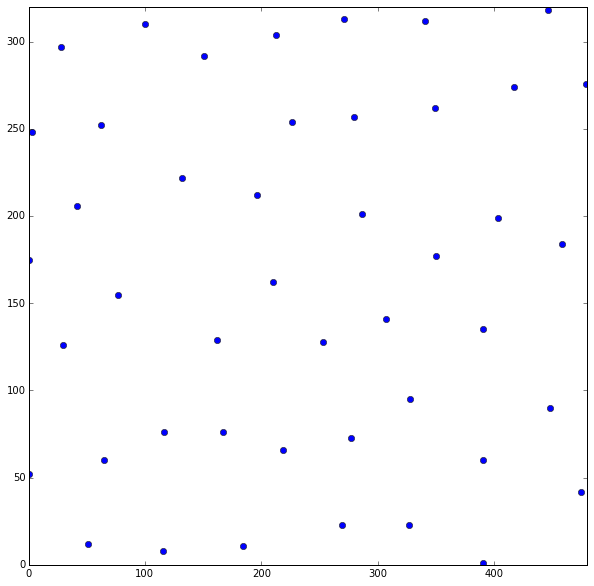

In [4]:
width = 480
height = 320
radius = 50.
pds = PoissonDiskSampler(width, height, radius, k = 100)
samples = pds.get_sample()
print 'samples size: ', len(samples)
xs = [int(s[0]) for s in samples]
ys = [int(s[1]) for s in samples]
plt.plot(xs, ys, 'o')
plt.xlim([0,width])
plt.ylim([0,height])
plt.show()

# Working with Caffe's Net Object

In [5]:
dh = cnn_utils.DeepHelper(interpolation=cv2.INTER_NEAREST)

In [6]:
img = caffe.io.load_image('/home/ipl/datasets/CUB-200-2011/CUB_200_2011/CUB_200_2011/images/084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0062_795434.jpg')

In [7]:
img.shape

(299, 400, 3)

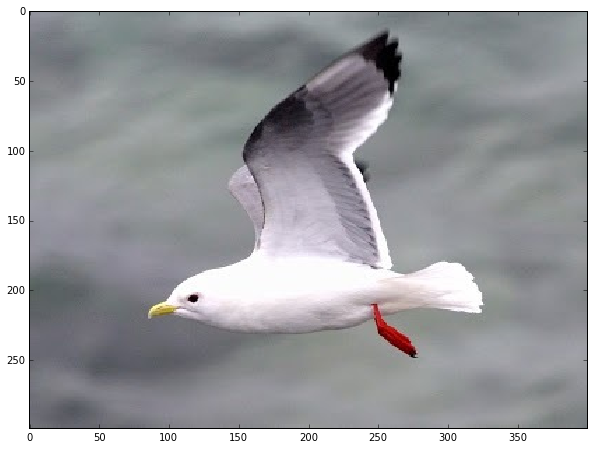

In [8]:
plt.imshow(img)

In [9]:
dh.init_with_image(img)

In [10]:
for k in dh.feats.keys():
    print k, dh.feats[k].shape

conv3 (299, 400, 384)
conv2 (299, 400, 256)
conv1 (299, 400, 96)
conv5 (299, 400, 256)
conv4 (299, 400, 384)


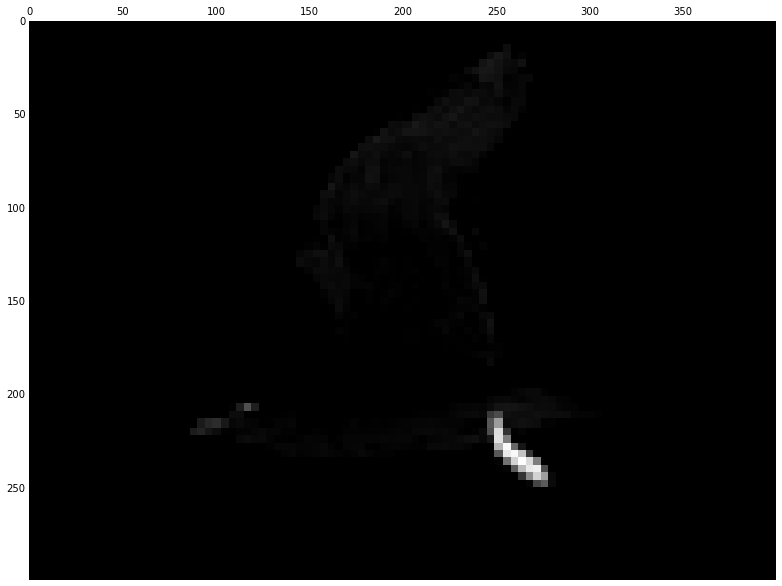

In [11]:
plt.matshow(dh.feats['conv1'][:, :, 65])

In [12]:
dh.ffeats.shape

(299, 400, 1376)

In [13]:
box = geometry_utils.Box(200, 270, 200, 300)
new_img = box.draw_box(img)

(47, 2)


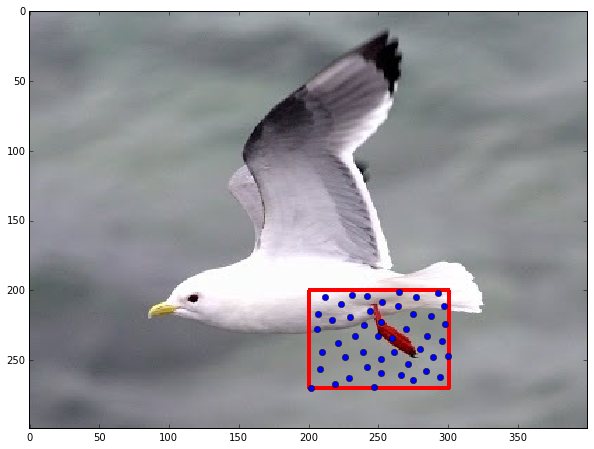

In [14]:
points = box.generate_points_inside(policy='poisson_disk', param=10)
print points.shape
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

geometry_utils.draw_points(points, ax, color='blue')
ax.imshow(new_img)
plt.show()

## BBox experiments

In [15]:
cub = dataset_utils.CUB_200_2011('/home/ipl/datasets/CUB-200-2011/CUB_200_2011/CUB_200_2011/')

In [16]:
imgs_addr = cub.get_all_image_addrs()

In [41]:
imgs_bbox = cub.get_bbox()

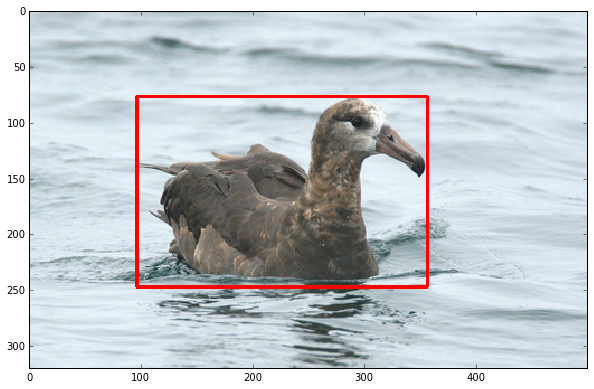

In [45]:
img_id = 60

img = caffe.io.load_image(imgs_addr[img_id])
bbox = imgs_bbox[img_id]
plt.imshow(bbox.draw_box(img))